In [1]:
import os

In [2]:
os.chdir('..')

# Load data

In [9]:
from src.utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def load_fer2013(path):
    '''Load fer2013 emotion classification dataset
    Paramenters:
        path (str): The file location of dataset
    Returns:
        tuple (faces, emotions) includes gray images and list emotions
    '''
    data = pd.read_csv(path)
    pixels = data['pixels'].tolist()
    width = height = 48
    faces = []
    for pixel_sequence in pixels:
        face = np.asarray([int(pixel) for pixel in pixel_sequence.split(' ')]).reshape((height, width))
        faces.append(face)
    emotions = data['emotion']
    index2labels = ['angry', 'disgust', 'fear', 'happy', 'sad',
                'surprise', 'neutral']
    emotion_labels = []
    for emotion in emotions:
        emotion_labels.append(index2labels[emotion])
    return faces, emotion_labels


In [17]:
def visualize_data(images, labels, rows=2, cols=5,size_subplot=2):
    num_samples = rows * cols
    plt.figure(figsize=(size_subplot*cols, size_subplot*rows))
    for n, i in enumerate(np.random.randint(len(images), size=rows*cols)):
        plt.subplot(rows, cols, n + 1)
        plt.imshow(images[i], 'gray')
        plt.axis('off')
        plt.title(labels[i])
    plt.show()


In [30]:
faces, emotions = load_fer2013('dataset/fer2013/fer2013.csv')

In [28]:
s=0
for emotion in emotions:
    s = s + emotion
print(s)

119262


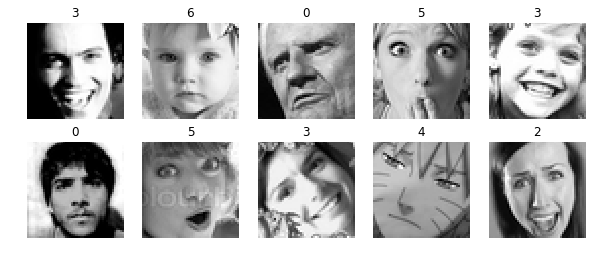

In [24]:
visualize_data(faces, emotions)

# Create models

In [3]:
from src.models import simple_cnn

/home/trivu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
model = simple_cnn((48, 48, 3), 6)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
__________